In [384]:
import tensorflow as tf
import tensorflow_hub as hub

# For saving 'feature vectors' into a txt file
import numpy as np
 
# Time for measuring the process time
import time

# Glob for reading file names in a folder
import glob
import os.path
import base64

In [385]:
#%pip install tensorflow_hub

In [386]:
img = tf.io.read_file('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/0.jpg')
img = tf.io.decode_jpeg(img, channels=3)
img = tf.image.resize_with_pad(img, 224, 224)
img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4" 
  
  # Load the module
module = hub.load(module_handle)
features = module(img)
feature_set = np.squeeze(features)
len(feature_set)



1792

In [387]:
#################################################
# Imports and function definitions
#################################################
# For running inference on the TF-Hub module.
import tensorflow as tf
import tensorflow_hub as hub

# For saving 'feature vectors' into a txt file
import numpy as np

# Time for measuring the process time
import time

# Glob for reading file names in a folder
import glob
import os.path
#################################################

#################################################
# This function:
# Loads the JPEG image at the given path
# Decodes the JPEG image to a uint8 W X H X 3 tensor
# Resizes the image to 224 x 224 x 3 tensor
# Returns the pre processed image as 224 x 224 x 3 tensor
#################################################
def load_img(path):

  # Reads the image file and returns data type of string
  img = tf.io.read_file(path)

  # Decodes the image to W x H x 3 shape tensor with type of uint8
  img = tf.io.decode_jpeg(img, channels=3)

  # Resize the image to 224 x 244 x 3 shape tensor
  img = tf.image.resize_with_pad(img, 224, 224)

  # Converts the data type of uint8 to float32 by adding a new axis
  # This makes the img 1 x 224 x 224 x 3 tensor with the data type of float32
  # This is required for the mobilenet model we are using
  img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

  return img

#################################################
# This function:
# Loads the mobilenet model in TF.HUB
# Makes an inference for all images stored in a local folder
# Saves each of the feature vectors in a file
#################################################
def get_image_feature_vectors():

  i = 0

  start_time = time.time()

  print("---------------------------------")
  print ("Step.1 of 2 - mobilenet_v2_140_224 - Loading Started at %s" %time.ctime())
  print("---------------------------------")

  # Definition of module with using tfhub.dev handle
  module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4" 
  
  # Load the module
  module = hub.load(module_handle)

  print("---------------------------------")
  print ("Step.1 of 2 - mobilenet_v2_140_224 - Loading Completed at %s" %time.ctime())
  print("--- %.2f minutes passed ---------" % ((time.time() - start_time)/60))

  print("---------------------------------")
  print ("Step.2 of 2 - Generating Feature Vectors -  Started at %s" %time.ctime())
 

  # Loops through all images in a local folder
  for filename in glob.glob('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/*.jpg'): #assuming gif
    i = i + 1

    print("-----------------------------------------------------------------------------------------")
    print("Image count                     :%s" %i)
    print("Image in process is             :%s" %filename)

    # Loads and pre-process the image
    img = load_img(filename)

    # Calculate the image feature vector of the img
    features = module(img)   
  
    # Remove single-dimensional entries from the 'features' array
    feature_set = np.squeeze(features)  

    # Saves the image feature vectors into a file for later use

    outfile_name = os.path.basename(filename).split('.')[0] + ".npz"
    out_path = os.path.join('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/', outfile_name)

    # Saves the 'feature_set' to a text file
    np.savetxt(out_path, feature_set, delimiter=',')

    print("Image feature vector saved to   :%s" %out_path)
  
  print("---------------------------------")
  print ("Step.2 of 2 - Generating Feature Vectors - Completed at %s" %time.ctime())
  print("--- %.2f minutes passed ---------" % ((time.time() - start_time)/60))
  print("--- %s images processed ---------" %i)
    
get_image_feature_vectors()

---------------------------------
Step.1 of 2 - mobilenet_v2_140_224 - Loading Started at Wed Apr 14 00:18:11 2021
---------------------------------
---------------------------------
Step.1 of 2 - mobilenet_v2_140_224 - Loading Completed at Wed Apr 14 00:18:22 2021
--- 0.18 minutes passed ---------
---------------------------------
Step.2 of 2 - Generating Feature Vectors -  Started at Wed Apr 14 00:18:22 2021
-----------------------------------------------------------------------------------------
Image count                     :1
Image in process is             :C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics\0.jpg
Image feature vector saved to   :C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/0.npz
-----------------------------------------------------------------------------------------
Image count                     :2
Image in process is             :C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics\1.jpg
Image feature vector saved to   :C:/Users/yashk/Des

In [49]:
#%pip install annoy

  Created wheel for annoy: filename=annoy-1.17.0-cp38-cp38-win_amd64.whl size=52971 sha256=776645f068f1c6c4cc425cc50fa550ae6a0f633b5714b276912918db8216df7f
  Stored in directory: c:\users\yashk\appdata\local\pip\cache\wheels\77\01\de\4421524f9997a25dfa7291121565d12ef514154945e80e907a
Successfully built annoy
Note: you may need to restart the kernel to use updated packages.


In [5]:
#json.loads('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/json1.json')

In [405]:
import numpy as np
import time

import glob
import os.path
import json
# Annoy and Scipy for similarity calculation
from annoy import AnnoyIndex
from scipy import spatial
def match_id(filename):
    f = open('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/json1.json',)
    data = json.load(f)
    #print(data[0]['imgs'][0]['ImageName'])
    for line in data:
        for img in line['imgs']:
            #print(type(img['ImageName']))
            if str(filename)==str(img['ImageName']):
                #print(img)
                return line['product_id']
                #print(img)
                break
                f.close()
#################################################

#################################################
# This function; 
# Reads all image feature vectores stored in /feature-vectors/*.npz
# Adds them all in Annoy Index
# Builds ANNOY index
# Calculates the nearest neighbors and image similarity metrics
# Stores image similarity scores with productID in a json file
#################################################
def cluster():

  start_time = time.time()
  
  print("---------------------------------")
  print ("Step.1 - ANNOY index generation - Started at %s" %time.ctime())
  print("---------------------------------")

  # Defining data structures as empty dict
  file_index_to_file_name = {}
  file_index_to_file_vector = {}
  file_index_to_product_id = {}

  # Configuring annoy parameters
  dims = 1792
  n_nearest_neighbors = 20
  trees = 10000

  # Reads all file names which stores feature vectors 
  allfiles = glob.glob('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/*.npz')

  t = AnnoyIndex(dims, metric='angular')

  for file_index, i in enumerate(allfiles):
    
    # Reads feature vectors and assigns them into the file_vector 
    file_vector = np.loadtxt(i)

    # Assigns file_name, feature_vectors and corresponding product_id
    file_name=int()
    file_name = os.path.basename(i).split('.')[0]
    print(file_name)
    file_index_to_file_name[file_index] = file_name
    file_index_to_file_vector[file_index] = file_vector
    file_index_to_product_id[file_index] = match_id(file_name)

    # Adds image feature vectors into annoy index   
    t.add_item(file_index, file_vector)

    print("---------------------------------")
    print("Annoy index     : %s" %file_index)
    print("Image file name : %s" %file_name)
    print("Product id      : %s" %file_index_to_product_id[file_index])
    print("--- %.2f minutes passed ---------" % ((time.time() - start_time)/60))


  # Builds annoy index
  t.build(trees)

  print ("Step.1 - ANNOY index generation - Finished")
  print ("Step.2 - Similarity score calculation - Started ") 
  
  named_nearest_neighbors = []
  # Loops through all indexed items
  for i in file_index_to_file_name.keys():

    # Assigns master file_name, image feature vectors and product id values
    master_file_name = file_index_to_file_name[i]
    master_vector = file_index_to_file_vector[i]
    master_product_id = file_index_to_product_id[i]

    # Calculates the nearest neighbors of the master item
    nearest_neighbors = t.get_nns_by_item(i, n_nearest_neighbors)

    # Loops through the nearest neighbors of the master item
    for j in nearest_neighbors:

      print(j)

      # Assigns file_name, image feature vectors and product id values of the similar item
      neighbor_file_name = file_index_to_file_name[j]
      neighbor_file_vector = file_index_to_file_vector[j]
      neighbor_product_id = file_index_to_product_id[j]

      # Calculates the similarity score of the similar item
      similarity = 1 - spatial.distance.cosine(master_vector, neighbor_file_vector)
      rounded_similarity = int((similarity * 10000)) / 10000.0
      
      #print(str(master_product_id)+'---------------++++++++++++++++++++++++++++++++++++++++++')
      # Appends master product id with the similarity score 
      # and the product id of the similar items
      named_nearest_neighbors.append({
        'similarity': rounded_similarity,
        'master_pi': master_product_id,
        'similar_pi': neighbor_product_id})

    print("---------------------------------") 
    print("Similarity index       : %s" %i)
    print("Master Image file name : %s" %file_index_to_file_name[i]) 
    print("Nearest Neighbors.     : %s" %nearest_neighbors) 
    print("--- %.2f minutes passed ---------" % ((time.time() - start_time)/60))

  
  print ("Step.2 - Similarity score calculation - Finished ") 

  # Writes the 'named_nearest_neighbors' to a json file
  with open('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/nearest_neighbors.json', 'w') as out:
    json.dump(named_nearest_neighbors, out, indent=2)

  print("Step.3 - Data stored in 'nearest_neighbors.json' file ") 
  print("--- Prosess completed in %.2f minutes ---------" % ((time.time() - start_time)/60))

cluster()

---------------------------------
Step.1 - ANNOY index generation - Started at Wed Apr 14 00:27:30 2021
---------------------------------
0
---------------------------------
Annoy index     : 0
Image file name : 0
Product id      : 0
--- 0.00 minutes passed ---------
1
---------------------------------
Annoy index     : 1
Image file name : 1
Product id      : 1
--- 0.00 minutes passed ---------
10
---------------------------------
Annoy index     : 2
Image file name : 10
Product id      : 11
--- 0.00 minutes passed ---------
100
---------------------------------
Annoy index     : 3
Image file name : 100
Product id      : 92
--- 0.00 minutes passed ---------
101
---------------------------------
Annoy index     : 4
Image file name : 101
Product id      : 95
--- 0.00 minutes passed ---------
102
---------------------------------
Annoy index     : 5
Image file name : 102
Product id      : 97
--- 0.00 minutes passed ---------
103
---------------------------------
Annoy index     : 6
Image 

In [406]:
import elasticsearch
# Import Elasticsearch package 
from elasticsearch import Elasticsearch 
# Connect to the elastic cluster
es=Elasticsearch([{'host':'localhost','port':9200}])
es

<Elasticsearch([{'host': 'localhost', 'port': 9200}])>

In [407]:
#es.indices.delete(index='nn_index', ignore=[400, 404])

In [408]:
#Now let's store this document in Elasticsearch 
#res = es.index(index='megacorp',doc_type='employee',id=1,body=e1)
#res

In [409]:
f = open('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/nearest_neighbors.json',)
data_nn = json.load(f)
#for i,line in enumerate(data):
#    elastic_nn_json1=es.index(index='nn_index',doc_type='nn_doc_type',id=i,body=line)


In [410]:
f = open('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/json1.json',)
data_json1 = json.load(f)
#for i,line in enumerate(data):
#    elastic_data_json=es.index(index='json1_index',doc_type='json1_doc_type',id=i,body=line)


In [411]:
#res1=es.get(index='nn_index',doc_type='nn_doc_type',id=3)
#print(res1['_source']['similar_pi'])

In [412]:
def search(es_object, index_name, search):
    res2 = es_object.search(index=index_name, body=search)
    return(res2)

In [413]:
#search_object = {'query': {'match': {'imgs.ImageName': 73}}}
#res2=search(es, 'json1_index', json.dumps(search_object))

In [414]:
#x=64
#search_object = {'query': {'match': {'master_pi': str(x)}}}
#res3=search(es, 'nn_index', json.dumps(search_object))

In [415]:
#res3['hits']['hits'][1]['_source']['similar_pi']

In [416]:
def create_index(es_object, index_name='nn_index1'):
    created = False
    # index settings
    settings = {
  'settings':{
    "number_of_shards":1,
    "number_of_replicas":0
      },
  "mappings":{
      "members": {
          "dynamic": "strict",
    "properties":{
      "imgs":{"type":"text",
          "picture":{"type":"text"}
          },
          "ImageName":{"type":"text"},
        }
      },
      "category_id":{"type":"text"},
      "product_id":{"type":"text"},

        }
      }
    
 


    try:
        if not es_object.indices.exists(index_name):
            # Ignore 400 means to ignore "Index Already Exist" error.
            es_object.indices.create(index=index_name, ignore=400, body=settings)
            print('Created Index')
        created = True
    except Exception as ex:
        print(str(ex))
    finally:
        return created
#x=create_index(es)
#print(x)

In [417]:
es.indices.delete(index='json1_index1', ignore=[400, 404])
es.indices.delete(index='nn_index1', ignore=[400, 404])
def store_record(elastic_object, index_name,doc_type1, record):
    for i,line in enumerate(record):
        try:
            outcome = elastic_object.index(index=index_name, doc_type=doc_type1, body=line)
        except Exception as ex:
            print('Error in indexing data')
            print(str(ex))
        
store_record(es,'json1_index1','json1_doc_type2',data_json1)
store_record(es,'nn_index1','nn_doc_type2',data_nn)

In [418]:
search_object ={
"query":
{
   "term":
   {
     "product_id":73
   }
},
  "fields": ["imgs.picture.$binary"],
  "_source": "false"
}
res3=search(es, 'json1_index1', json.dumps(search_object))

In [419]:
#res3['hits']['hits'][0]['fields']['imgs.picture.$binary']

In [420]:
search_object ={
"query":
{
   "term":
   {
     "master_pi":73
   }
},
  "fields": ["similar_pi"],
  "_source": "false"
}
res4=search(es, 'nn_index1', json.dumps(search_object))

In [465]:
y=input()

def fetch_prod_id(ImgName):
    search_object ={
    "query":
    {
   "term":
   {
     "imgs.ImageName":ImgName
   }
    },
  "fields": ["product_id"],
  "_source": "false"
    }
    res5=search(es, 'json1_index1', json.dumps(search_object))
    return(res5['hits']['hits'][0]['fields']['product_id'][0])
res5=fetch_prod_id(int(y)) 
#print(res5['hits']['hits'][0]['fields']['product_id'][0])
res5

 0


0

In [438]:
def fetch_nn(prod_id):
    z=[]
    search_object ={ 
        "size":30,
        "sort" : [
        { "similarity" : {"order" : "desc"}},
        "master_pi","similar_pi",
        "_score"
      ],
    "query":
    {
   "term":
   {
     "master_pi":prod_id
   }
    },
  "fields": ["similar_pi"],
  "_source": "false"
    }
    res6=search(es, 'nn_index1', json.dumps(search_object))
    for i,line in enumerate(res6['hits']['hits']):
        z.append(line['fields']['similar_pi'][0])
        #print(line['fields']['similar_pi'][0])

    return(z)   
z=fetch_nn(res5)
print(z)

[1, 98, 0, 98, 55, 56, 30, 8, 64, 90, 99, 73, 66, 15, 19, 28, 37, 11, 72, 73]


In [444]:
#for i,line in enumerate(res6['hits']['hits']):
#    #list.append(line['fields']['similar_pi'][0])
#    print(line['fields']['similar_pi'][0])
res = []
for i in z:
    if i not in res:
        res.append(i)
print(res)

[1, 98, 0, 55, 56, 30, 8, 64, 90, 99, 73, 66, 15, 19, 28, 37, 11, 72]


In [445]:
def fetch_similar_imgs(list1):
    z=[]
    search_object ={
    "size":20,
    "query":
    {

       "terms":
       {
         "product_id":list1
       }
    },
      "fields": ["imgs.picture.$binary"],
      "_source": "false"
    }
    res7=search(es, 'json1_index1', json.dumps(search_object))

    return(res7)   
res7=fetch_similar_imgs(z)
print(res7)

{'took': 11, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 18, 'relation': 'eq'}, 'max_score': 1.0, 'hits': [{'_index': 'json1_index1', '_type': 'json1_doc_type2', '_id': 'gSWizngBdCCoonqG8pp-', '_score': 1.0, '_source': {}, 'fields': {'imgs.picture.$binary': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAC0ALQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU

In [441]:
#res7['hits']['hits'][0]['fields']['imgs.picture.$binary'][0]

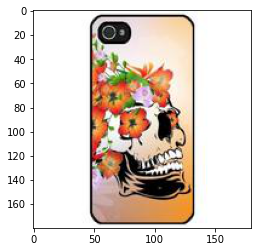

In [446]:
from skimage.io import imread
import io
import matplotlib.pyplot as plt
import base64
picture = imread(io.BytesIO(base64.b64decode(res7['hits']['hits'][0]['fields']['imgs.picture.$binary'][0])))
plt.imshow(picture);

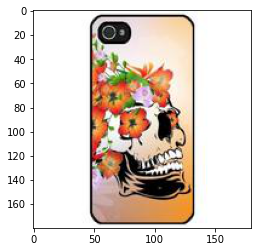

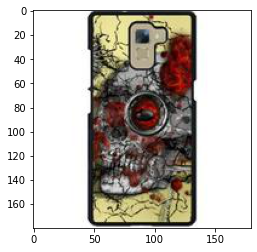

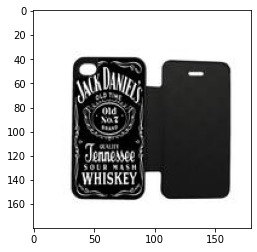

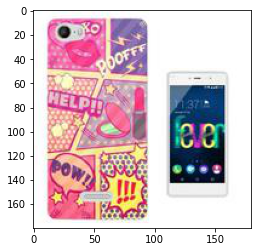

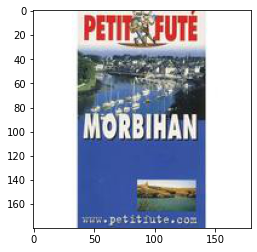

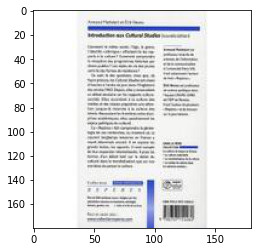

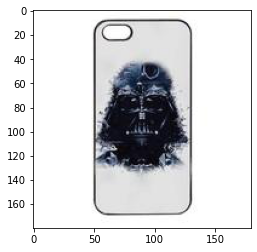

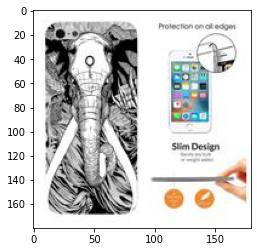

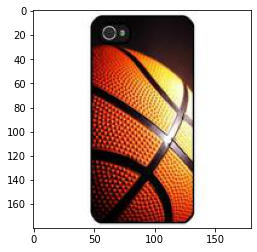

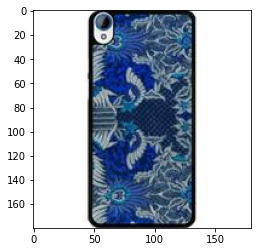

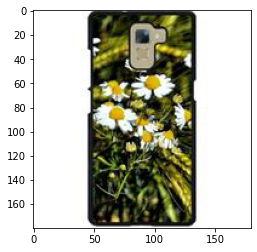

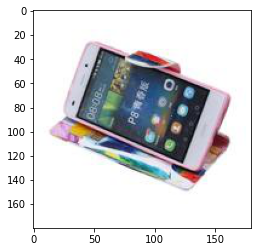

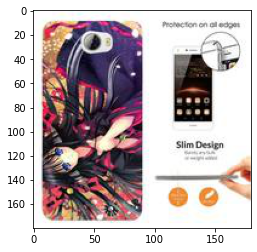

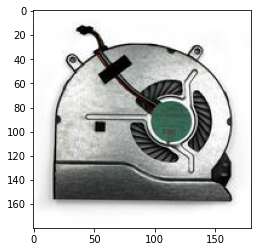

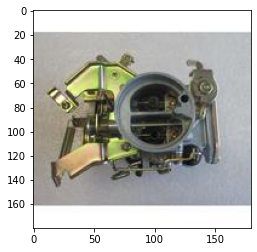

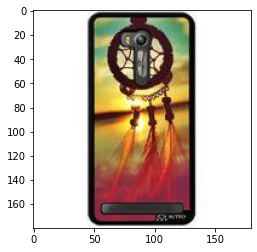

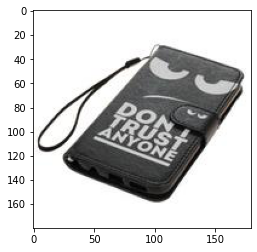

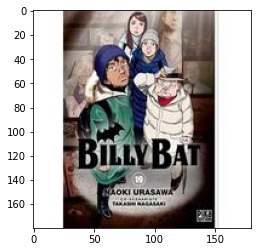

In [443]:
   # f, ax = plt.subplots(1, 20, figsize=(20, 8))
for i, img in enumerate(res7['hits']['hits']):
    for n,line in enumerate(img['fields']['imgs.picture.$binary']):
        picture = imread(io.BytesIO(base64.b64decode(line)))
        plt.imshow(picture)
        #ax[n].imshow(picture)
        #ax[n].set_axis_off()
    plt.show()